In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import find_peaks
g=9.8
L= 0.5
theta_0=0.1
theta_v0=0.5

In [46]:
N=100000
tfinal=10
theta_t = np.empty(N)
theta_t[0]=theta_0
theta_vt = np.empty(N)
theta_vt[0]=theta_v0
xt= np.empty(N)
xt[0]=math.sin(theta_t[0])*L
yt= np.empty(N)
yt[0]=math.cos(theta_t[0])*L
t = np.empty(N)
t[0] = 0
dt=tfinal/N
maximum = []
minimum = []
period_list = []
amp_list = []

In [47]:
def maxminv(x0,x1,x2,y0,y1,y2):
 # Máximo ou mínimo usando o polinómio de Lagrange
 # Dados (input): (x0,y0), (x1,y1) e (x2,y2)
 # Resultados (output): xm, ymax
 xab=x0-x1
 xac=x0-x2
 xbc=x1-x2
 a=y0/(xab*xac)
 b=-y1/(xab*xbc)
 c=y2/(xac*xbc)
 xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
 xm=0.5*xmla/(a+b+c)
 xta=xm-x0
 xtb=xm-x1
 xtc=xm-x2
 ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
 return xm, ymax

In [48]:
def eulercromer():
    for i in range(N-1):

        
        a_theta=-(g/L)*theta_t[i]
        theta_vt[i+1]=theta_vt[i]+a_theta*dt
        theta_t[i+1]=theta_t[i]+theta_vt[i+1]*dt
        t[i+1]= t[i] + dt

        xt[i+1]=math.sin(theta_t[i+1])*L
        yt[i+1]=math.cos(theta_t[i+1])*L

        if theta_t[i-1] < theta_t[i] > theta_t[i+1]:
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = theta_t[i-1], theta_t[i], theta_t[i+1]
            xm, xmax = maxminv(t0, t1, t2, y0, y1, y2)
            maximum.append([xm, xmax])
        if theta_t[i-1]> theta_t[i] < theta_t[i+1]:
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = theta_t[i-1], theta_t[i], theta_t[i+1]
            xm, xmin = maxminv(t0, t1, t2, y0, y1, y2)
            minimum.append([xm, xmin])
   
        
    return
eulercromer()

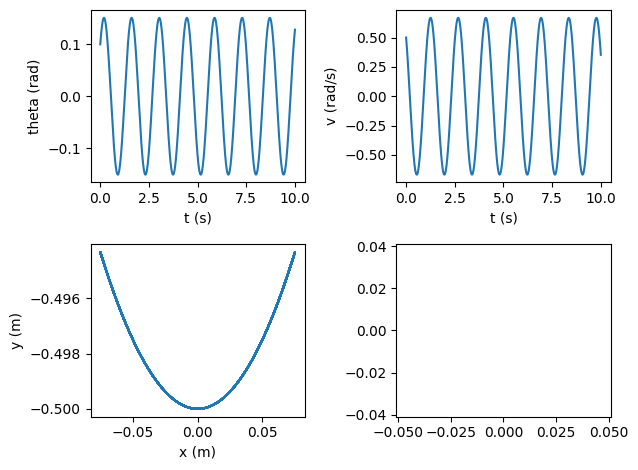

In [49]:
figure, axis = plt.subplots(2,2)
axis[0,0].plot(t, theta_t, linestyle="-")
axis[0,0].set_xlabel("t (s)")
axis[0,0].set_ylabel("theta (rad)")
axis[0,1].plot(t, theta_vt, linestyle="-")
axis[0,1].set_xlabel("t (s)")
axis[0,1].set_ylabel("v (rad/s)")
axis[1,0].plot(xt, -yt, linestyle="-")
axis[1,0].set_xlabel("x (m)")
axis[1,0].set_ylabel("y (m)")
plt.axis('equal')
figure.tight_layout()

In [50]:
def calculate_period():
    for i in range(1, len(maximum)):
        period_list.append(maximum[i][0]-maximum[i-1][0])
    estimated_period= (sum(period_list)/len(period_list))
    return estimated_period
def calculate_amplitude():
    avg_max = sum(x[1] for x in maximum) / len(maximum)
    avg_min = sum(x[1] for x in minimum) / len(minimum)
    return abs(avg_max - avg_min) / 2

T = calculate_period()
Amp = calculate_amplitude()
print(Amp, T)

0.15083137324698592 1.4192268836116402
